# Logistic Regression on Credit Card Data

## Classify whether application accepted or not using Logistic regression

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
card_df = pd.read_csv('creditcard.csv')

In [3]:
card_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
card_df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and extract their dtypes
for col in card_df.columns:
    # Compare if the dtype is object
    if card_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        card_df[col]=le.fit_transform(card_df[col])

# Check that everything has been converted to numeric
card_df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


#### EDA on dataset

In [5]:
# Check first 5 records
card_df.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [6]:
# Check last 5 records
card_df.tail(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1314,1,0,33.58333,4.566,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.192,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.600,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.700,0.008999,26.996670,0,1,0,60,1,7
1318,1,0,48.25000,3.700,0.111619,344.157500,1,0,2,2,1,0


In [7]:
# Check for data types, non-null values & memory usage
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int32  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int32  
 7   selfemp      1319 non-null   int32  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 108.3 KB


In [8]:
# Get central tendency, dispersion and shape of dataset’s distribution
card_df.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.440485,0.068992,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,0.496634,0.253536,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


In [9]:
# Checking Null values
card_df.isnull().sum() * 100 / card_df.shape[0]

card           0.0
reports        0.0
age            0.0
income         0.0
share          0.0
expenditure    0.0
owner          0.0
selfemp        0.0
dependents     0.0
months         0.0
majorcards     0.0
active         0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [10]:
# Check for the column labels of the DataFrame
card_df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [11]:
# Check the dimensions of the DataFrame
card_df.shape

(1319, 12)

In [12]:
# Check for the random sample from the DataFrame
card_df.sample(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
140,1,0,36.41667,3.0000,0.113059,282.5633,0,0,2,16,1,6
752,0,1,28.33333,1.9324,0.000621,0.0000,0,0,2,74,1,4
675,1,0,23.16667,2.8500,0.087458,207.7133,1,0,1,50,0,8
528,1,0,30.33333,2.6000,0.295686,640.6533,1,0,0,25,1,4
1283,1,0,27.83333,3.5400,0.006867,19.5900,0,0,2,3,1,0


#### Visualize data

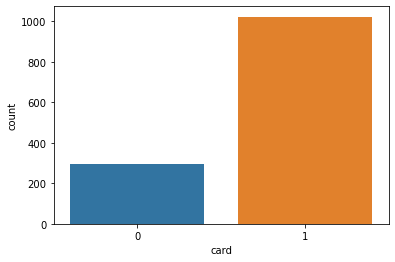

In [13]:
sns.countplot(x = 'card', data = card_df)

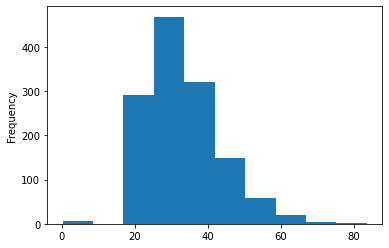

In [14]:
card_df['age'].plot.hist()

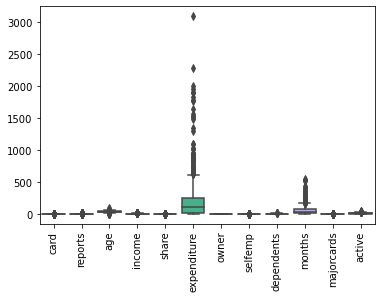

In [15]:
sns.boxplot(data = card_df)
plt.xticks(rotation ='vertical')
plt.show()

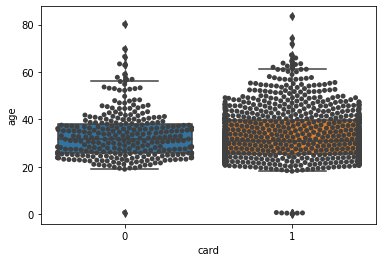

In [16]:
sns.boxplot(x = "card", y = "age", data = card_df)
sns.swarmplot(x = "card", y = "age", data = card_df, color = ".25")

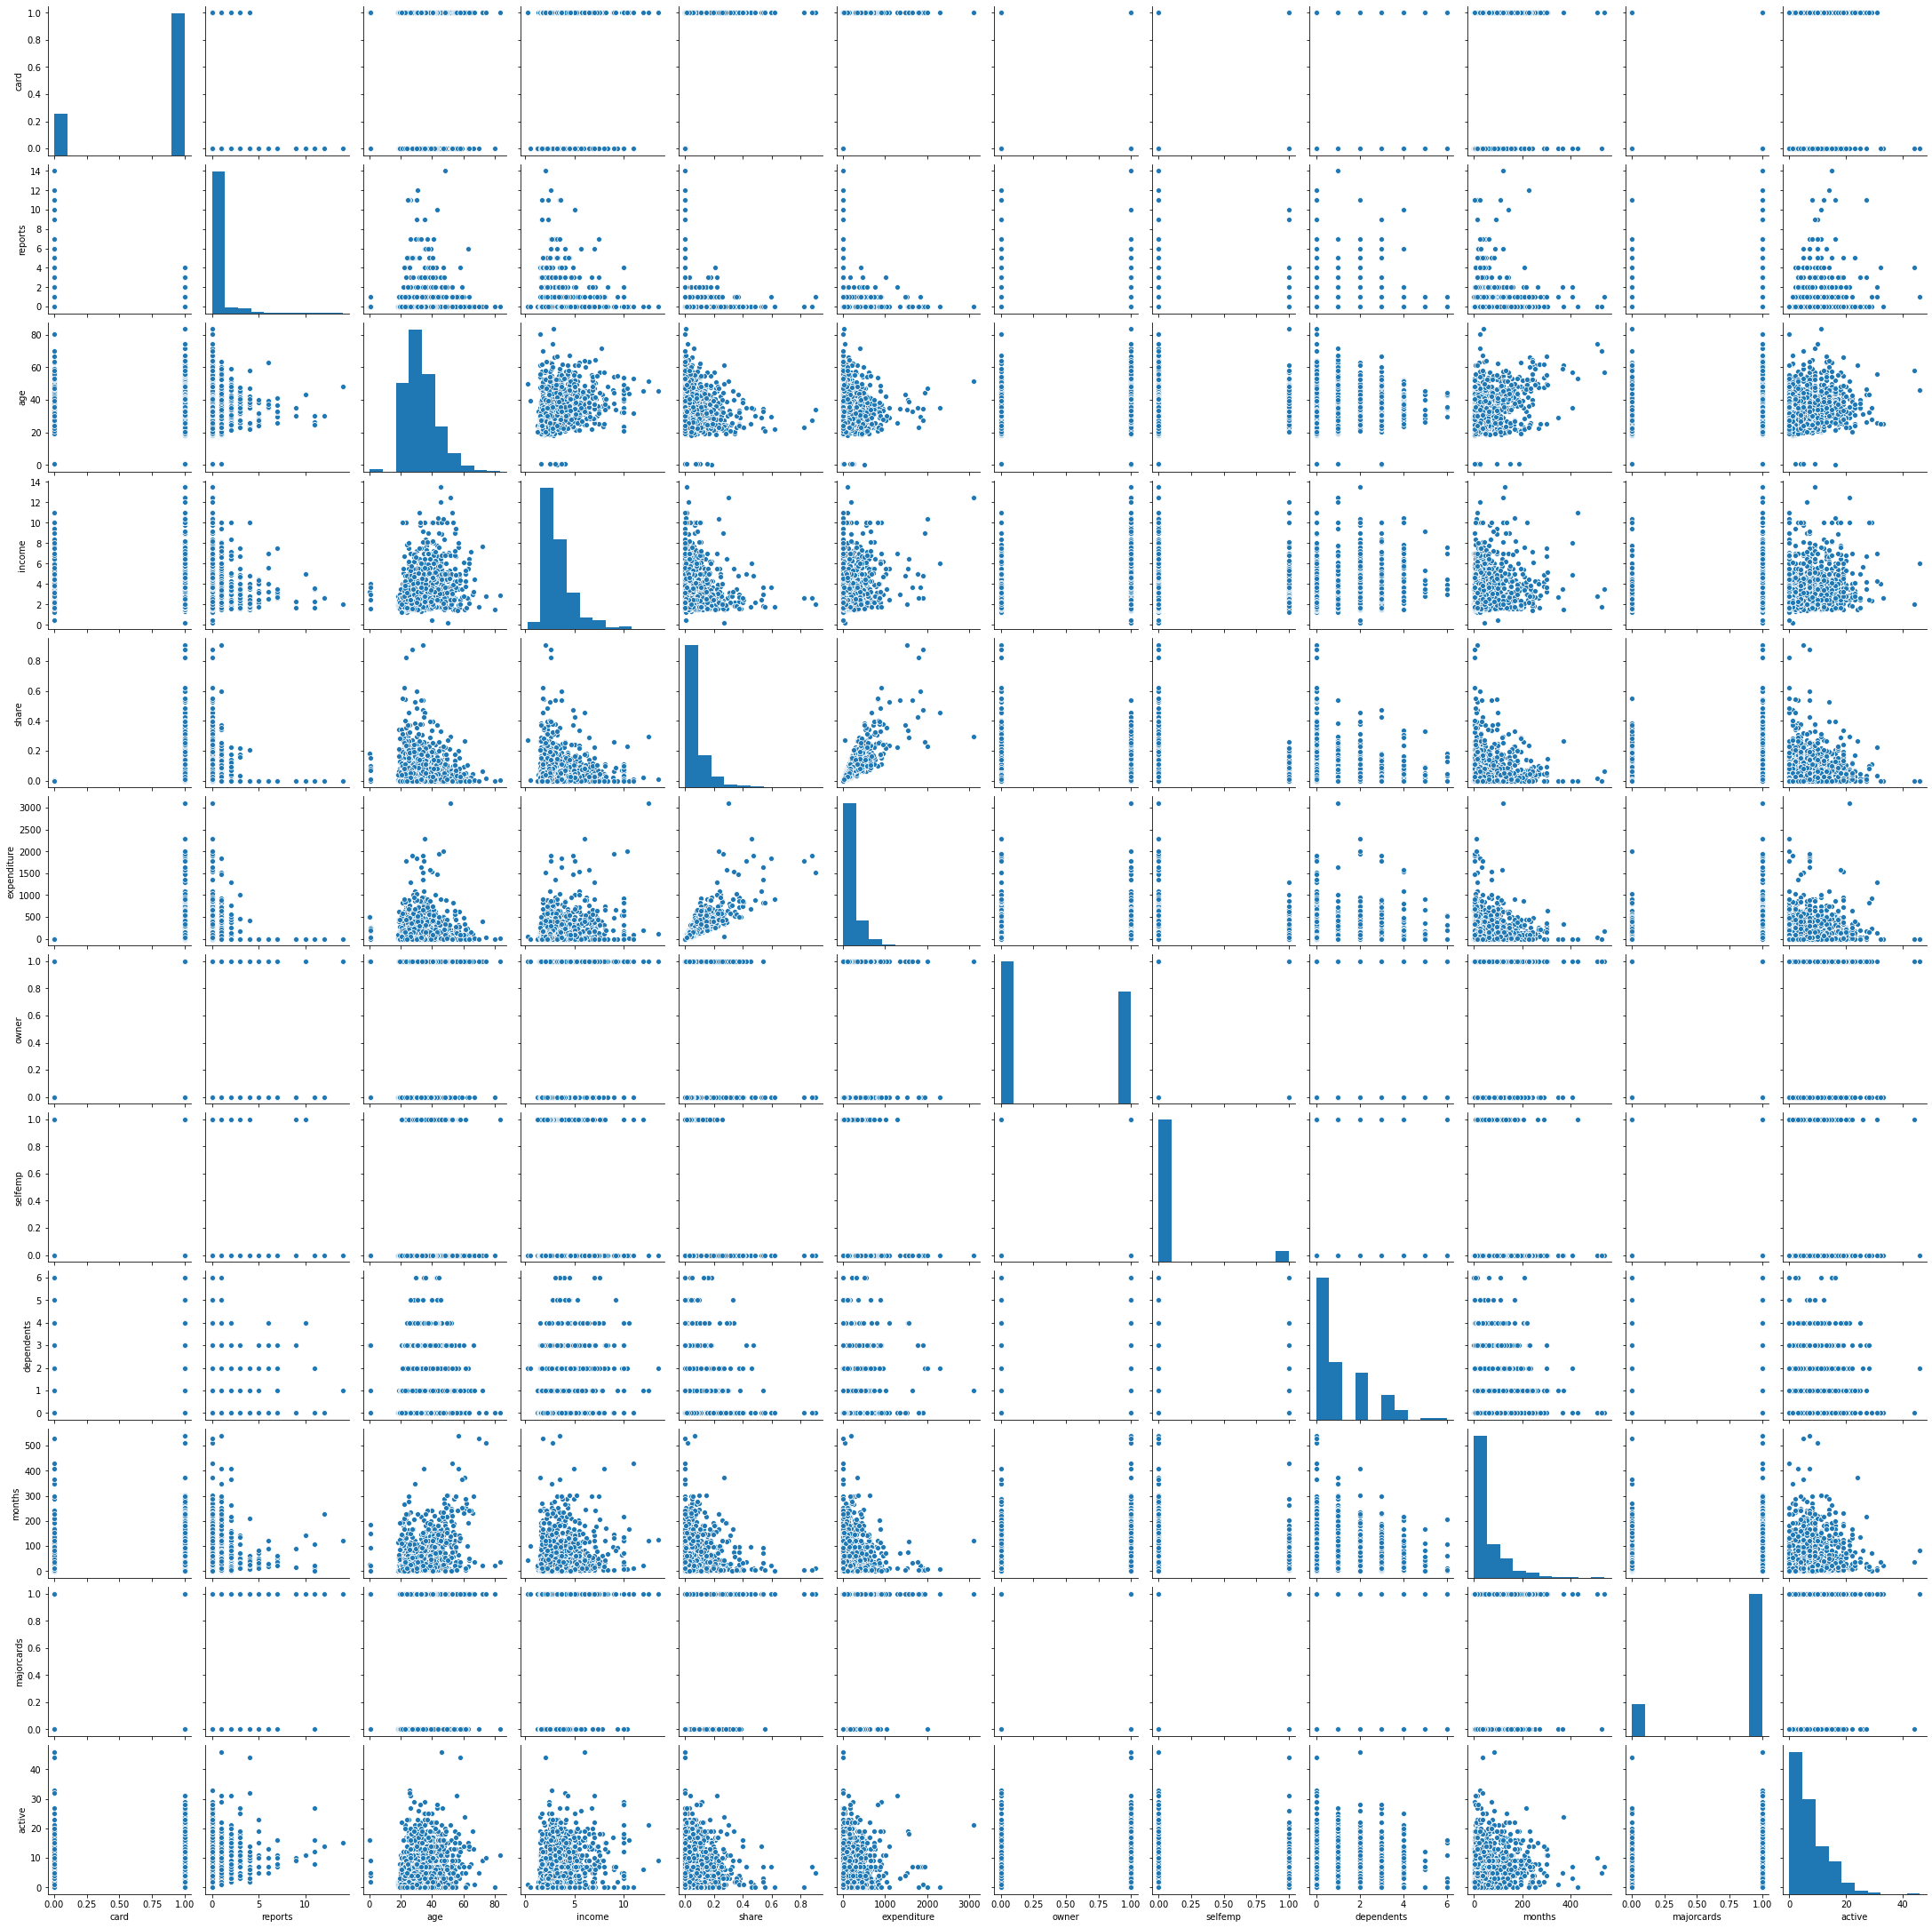

In [17]:
sns.pairplot(card_df)

In [18]:
# Put Card column in Y and other columns in the X
X = card_df.iloc[:, 1:11]
X

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards
0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1
1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1
2,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1
3,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1
4,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1
...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1
1315,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1
1316,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1
1317,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1


In [19]:
Y = card_df.iloc[:, 0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', max_iter = 1500)

In [24]:
logreg.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1500)

In [25]:
Y_predictions = logreg.predict(X_test)
Y_predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [26]:
logreg.coef_

array([[-1.29036692e+00,  6.62133132e-03, -1.68594533e-02,
        -6.85563033e-05,  1.65117866e+00,  8.01886380e-01,
         2.39611720e-01, -6.28757081e-01, -3.21339006e-03,
         5.01217860e-01]])

In [27]:
logreg.intercept_

array([-3.48246041])

In [28]:
prob_data = logreg.predict_proba(X)
prob_data

array([[0.00000000e+00, 1.00000000e+00],
       [1.04011865e-05, 9.99989599e-01],
       [1.99231365e-09, 9.99999998e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [29]:
Y_Predict = logreg.predict(X_test)
Y_Predict

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [30]:
Y_Prob = pd.DataFrame(prob_data)
Y_Prob

,0,1
0,0.000000e+00,1.000000
1,1.040119e-05,0.999990
2,1.992314e-09,1.000000
3,0.000000e+00,1.000000
4,0.000000e+00,1.000000
...,...,...
1314,5.698793e-05,0.999943
1315,9.999870e-01,0.000013
1316,0.000000e+00,1.000000
1317,0.000000e+00,1.000000


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_mat = confusion_matrix(Y_test, Y_Predict)
confusion_mat

array([[ 61,   0],
       [  7, 196]], dtype=int64)

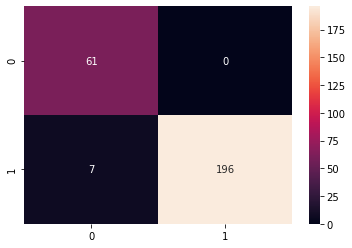

In [33]:
sns.heatmap(confusion_mat, annot = True, fmt = 'g')

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test, Y_Predict)

0.9734848484848485